# Goal 1: Investigate overall correlation between quantitative and qualitative metrics.

1.2: Cluster the experiments in the 3 expected clusters (based on assigned labels) and compare the results obtained using QM space and HM space

**Experiments Scenarios**:
- "Passing"
- "Overtaking"
- "Crossing 1"
- "Crossing 2"
- "Advanced 1"
- "Advanced 2"
- "Advanced 3"
- "Advanced 4"

**Labels**:
- "Good"
- "Mid"
- "Bad"

**QM Metrics**
- [0] Time to Goal
- [1] Path length
- [2] Cumulative heading changes
- [3] Avg robot linear speed

- [4] Social Work 
- [5] Social Work (per second)
- [6] Average minimum distance to closest person
- [7] Proxemics: intimate space occupancy
- [8] Proxemics: personal space occupancy
- [9] Proxemics: social space occupancy
- [10] Proxemics: public space occupancy

**HM Metrics**
- [0] Unobtrusiveness
- [1] Friendliness
- [2] Smoothness
- [3] Avoidance Foresight

In [24]:
import yaml
import numpy as np
import os
from os.path import expanduser

**Take data from files**

In [ ]:
#home = expanduser("~")
#insert the path to the repo here
home = '/workspaces/hunavsim_devcontainer/src/'
# Load config params for experiments
config = yaml.safe_load(open('params.yaml'))['social_metrics_match']

lab_data_path = home + config['data']['repo_dir'] + config['data']['lab_data_path']
survey_data_path = home + config['data']['repo_dir'] + config['data']['survey_data_path']
results_dir = home + config['data']['results_path']
print("lab data path: ", lab_data_path)
print("survey data path: ", survey_data_path)
print("results dir path: ", results_dir)

lab data path:  /workspaces/hunavsim_devcontainer/src//Social-Nav-Metrics-Matching/social_metrics_match/data_folder/validation_of_metrics_quantitative_and_lab_qualitative.ods
survey data path:  /workspaces/hunavsim_devcontainer/src//Social-Nav-Metrics-Matching/social_metrics_match/data_folder/qualitative_metrics_survey.xlsx
results dir path:  /workspaces/hunavsim_devcontainer/src//social_metrics_results


In [26]:
from utils.data_organization import organize_dict_lab_data, get_all_lab_data_arr, np_extract_exp_lab, np_single_lab_run
from utils.data_organization  import organize_dict_survey, weighted_avg_survey_data, get_robotics_knowledge, datacube_qual_survey_data

**LAB DATA**

In [27]:
dict_lab_data = organize_dict_lab_data(lab_data_path)

# Extract the np arrays of a specific experiments identified by its keys
passing_good_QM_array, passing_good_HM_array = np_single_lab_run(dict_lab_data, experiment='Passing', label='Good')
print(f"Passing single run QM shape:{passing_good_QM_array.shape}, passing single run HM shape: {passing_good_HM_array.shape}")
print(f"Passing good QM: {passing_good_QM_array},\nPassing good HM: {passing_good_HM_array}") 

# Extract the np arrays of a lab scenario (all the 3 runs with different labels), dividing QM and HM
passing_QM_array, passing_HM_array = np_extract_exp_lab(dict_lab_data, experiment='Advanced 4', order=False, normalization="rescale")
print(f"passing QM shape:{passing_QM_array.shape}, passing HM shape: {passing_HM_array.shape}")
# print(f"passing QM: {passing_QM_array},\npassing HM: {passing_HM_array}")

# Starting from the complete dataframe with lab data, Extract the np arrays of all lab scenarios dividing QM and HM
all_lab_QM_array, all_lab_HM_array = get_all_lab_data_arr(dict_lab_data, normalization="rescale")
print(f"All lab QM array: {all_lab_QM_array.shape}, All lab HM array: {all_lab_HM_array.shape}")
# print(f"All lab QM array: {all_lab_QM_array}, All lab HM array: {all_lab_HM_array}")

Passing single run QM shape:(11,), passing single run HM shape: (4,)
Passing good QM: [1.02326076e+01 4.55598068e+00 4.04913597e+00 1.99936767e-01
 1.99432749e+03 1.81716719e+02 2.37741413e+00 9.28961749e+00
 1.23341140e+01 7.28337237e+01 5.54254489e+00],
Passing good HM: [0.8 0.8 0.8 1. ]
passing QM shape:(11, 3), passing HM shape: (4, 3)
All lab QM array: (24, 11), All lab HM array: (24, 4)


**SURVEY DATA**

In [28]:
dict_survey_data = organize_dict_survey(survey_data_path)
robot_knowledge_array = get_robotics_knowledge(survey_data_path)

# To extract np arrays of all the survey data
survey_datacube = datacube_qual_survey_data(dict_survey_data, normalize=True)

# To directly extract the average and std: If Weighted average set w_avg=True (use robotics background knowledge as weights)
weighted_survey_array_avg, weighted_survey_array_std = weighted_avg_survey_data(dict_survey_data, robot_knowledge_array, w_avg=True,normalize=True)
print(f"survey weighted avg shape: {weighted_survey_array_avg.shape},\nsurvey weighted std shape:  {weighted_survey_array_std.shape}") 

survey weighted avg shape: (24, 4),
survey weighted std shape:  (24, 4)


# K-means clusters and 2D visualization with t-SNE

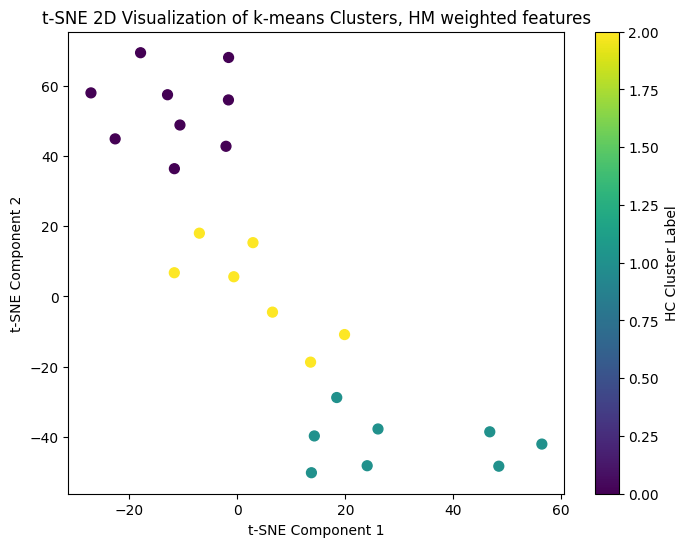

In [29]:
from utils.cluster_evaluation import cluster_K_means, run_TSNE
from utils.plot_utils import plot_tSNE_2D

p_value = 8
K = 3
n_dim = 2

# Process Survey data with robotics knowledge weights
clu_labels = cluster_K_means(weighted_survey_array_avg, K=K)
t_sne_results = run_TSNE(weighted_survey_array_avg, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM weighted')

# Process Survey data without robotics knowledge weights
# clu_labels = cluster_K_means(non_weighted_array, K=K)
# t_sne_results = run_TSNE(non_weighted_array, n=n_dim, p=p_value)
# plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM NOT weighted')

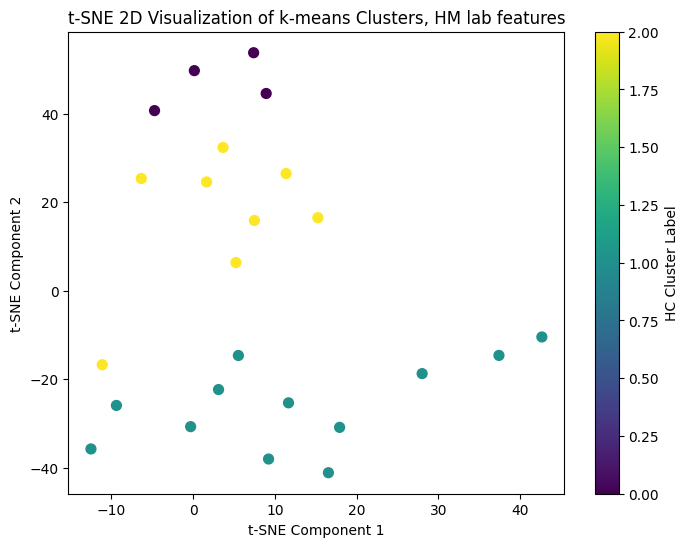

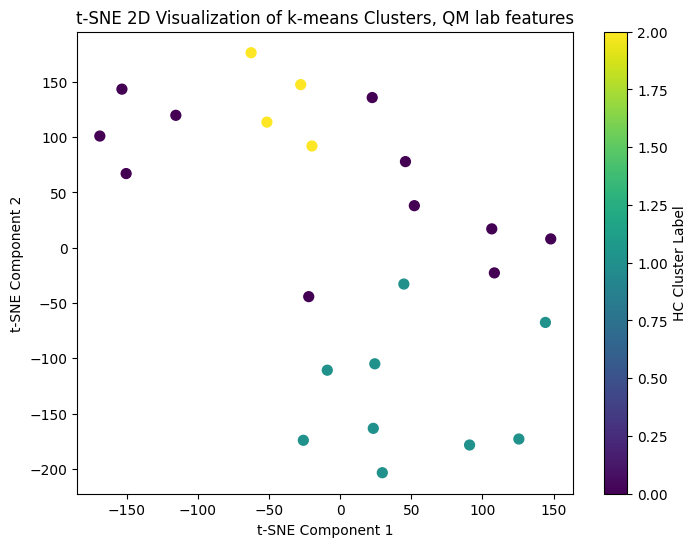

In [30]:
# Process Qualitative Lab data
clu_labels = cluster_K_means(all_lab_HM_array, K=K)
t_sne_results = run_TSNE(all_lab_HM_array, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='HM lab')

# Process Quantitative Lab data
clu_labels = cluster_K_means(all_lab_QM_array, K=K)
t_sne_results = run_TSNE(all_lab_QM_array, n=n_dim, p=p_value)
plot_tSNE_2D(cluster_data_2d = t_sne_results, cluster_labels = clu_labels, name='QM lab')

## Best qm features for similar clusters


In [31]:
from utils.cluster_evaluation import get_combination_for_best_matching
qm_survey_results_plus ={}
for k in [2,3,4,5]:
    survey_k_labels = cluster_K_means(weighted_survey_array_avg, K=k)
    key = str(k)
    qm_survey_results_plus[key] = get_combination_for_best_matching(all_lab_QM_array, survey_k_labels, K=k)

QM metrics columns: (3, 5, 6, 7, 8) ARI: 0.5427579678131903
QM metrics columns: (3, 5, 6, 7, 8, 10) ARI: 0.5427579678131903
QM metrics columns: (0, 1, 3, 5, 7, 8) ARI: 0.42001576044129235
QM metrics columns: (0, 1, 3, 5, 7, 8, 10) ARI: 0.42001576044129235
QM metrics columns: (3, 6, 9) ARI: 0.41854953389161004
QM metrics columns: (3, 6, 9, 10) ARI: 0.41854953389161004
QM metrics columns: (0, 3, 5, 6, 8) ARI: 0.31181102362204727
QM metrics columns: (0, 3, 5, 7, 8) ARI: 0.31181102362204727
QM metrics columns: (1, 3, 4, 6, 8) ARI: 0.31181102362204727
QM metrics columns: (1, 3, 4, 7, 8) ARI: 0.31181102362204727
QM metrics columns: (0, 3, 5, 6, 7, 8) ARI: 0.31181102362204727
QM metrics columns: (0, 3, 5, 6, 8, 10) ARI: 0.31181102362204727
QM metrics columns: (0, 3, 5, 7, 8, 10) ARI: 0.31181102362204727
QM metrics columns: (1, 3, 4, 6, 7, 8) ARI: 0.31181102362204727
QM metrics columns: (1, 3, 4, 6, 8, 9) ARI: 0.31181102362204727
QM metrics columns: (1, 3, 4, 6, 8, 10) ARI: 0.31181102362204727

## Single ARI metrics sum

In [32]:
ARI_for_k_2 = qm_survey_results_plus['2']
cumulative_ari_survey = {}

# Loop over each key in qm_survey_results_plus
for key, results_list in qm_survey_results_plus.items():
    metric_totals = {}
    # Process each dict in the list for the current key
    for result in results_list:
        # Get the tuple of metrics and the ARI score for this result
        metrics = result['metrics']
        ari = result['ARI']
        print(metrics, ari)
        # Since metrics could be a tuple (or nested tuple), flatten it
        try:
            # If metrics is a tuple of ints, iterate directly
            for m in metrics:
                if metric_totals.get(m) is not None:
                    print(metric_totals[m])
                metric_totals[m] = metric_totals.get(m,0) + ari
                print(metric_totals[m])
        except TypeError:
            # If not iterable, treat as a single metric
            metric_totals[metrics] = metric_totals.get(metrics, 0) + ari
    cumulative_ari_survey[key] = metric_totals

# Show the created cumulative ARI dictionary
print(cumulative_ari_survey)
dos = cumulative_ari_survey['2']
tres = cumulative_ari_survey['3']
cuadro = cumulative_ari_survey['4']
cinco = cumulative_ari_survey['5']
# Order the keys of dos according to the highest cumulative ARI value
sorted_keys_dos = sorted(dos, key=dos.get, reverse=True)
sorted_keys_tres = sorted(tres, key=tres.get, reverse=True)
sorted_keys_cuadro = sorted(cuadro, key=cuadro.get, reverse=True)
sorted_keys_cinco = sorted(cinco, key=cinco.get, reverse=True)
print("Ordered keys by cumulative ARI:", sorted_keys_dos)

cumulative_ari_survey_sorted_2 = {k: cumulative_ari_survey['2'][k] for k in sorted_keys_dos}
cumulative_ari_survey_sorted_3 = {k: cumulative_ari_survey['3'][k] for k in sorted_keys_tres}
cumulative_ari_survey_sorted_4 = {k: cumulative_ari_survey['4'][k] for k in sorted_keys_cuadro}
cumulative_ari_survey_sorted_5 = {k: cumulative_ari_survey['5'][k] for k in sorted_keys_cinco}



# Combine the survey cumulative ARI from keys '2', '3', '4', and '5' into a single dictionary
all_survey_metrics = set(cumulative_ari_survey_sorted_2.keys()) | set(cumulative_ari_survey_sorted_3.keys()) | set(cumulative_ari_survey_sorted_4.keys()) | set(cumulative_ari_survey_sorted_5.keys())
combined_cumulative= {
    metric: cumulative_ari_survey_sorted_2.get(metric, 0) +
            cumulative_ari_survey_sorted_3.get(metric, 0) 
    for metric in all_survey_metrics
}

# Sort the combined dictionary in descending order of cumulative ARI
combined_cumulative_sorted = dict(sorted(combined_cumulative.items(), key=lambda x: x[1], reverse=True))

# Print out each individual sorted dict and the combined one
print("Cumulative ARI survey (key '2') sorted:", cumulative_ari_survey_sorted_2)
print("Cumulative ARI survey (key '3') sorted:", cumulative_ari_survey_sorted_3)
print("Cumulative ARI survey (key '4') sorted:", cumulative_ari_survey_sorted_4)
print("Cumulative ARI survey (key '5') sorted:", cumulative_ari_survey_sorted_5)
print("Combined cumulative ARI survey sorted:", combined_cumulative_sorted)

(3, 5, 6, 7, 8) 0.5427579678131903
0.5427579678131903
0.5427579678131903
0.5427579678131903
0.5427579678131903
0.5427579678131903
(3, 5, 6, 7, 8, 10) 0.5427579678131903
0.5427579678131903
1.0855159356263806
0.5427579678131903
1.0855159356263806
0.5427579678131903
1.0855159356263806
0.5427579678131903
1.0855159356263806
0.5427579678131903
1.0855159356263806
0.5427579678131903
(0, 1, 3, 5, 7, 8) 0.42001576044129235
0.42001576044129235
0.42001576044129235
1.0855159356263806
1.505531696067673
1.0855159356263806
1.505531696067673
1.0855159356263806
1.505531696067673
1.0855159356263806
1.505531696067673
(0, 1, 3, 5, 7, 8, 10) 0.42001576044129235
0.42001576044129235
0.8400315208825847
0.42001576044129235
0.8400315208825847
1.505531696067673
1.9255474565089654
1.505531696067673
1.9255474565089654
1.505531696067673
1.9255474565089654
1.505531696067673
1.9255474565089654
0.5427579678131903
0.9627737282544826
(3, 6, 9) 0.41854953389161004
1.9255474565089654
2.3440969904005753
1.0855159356263806
1

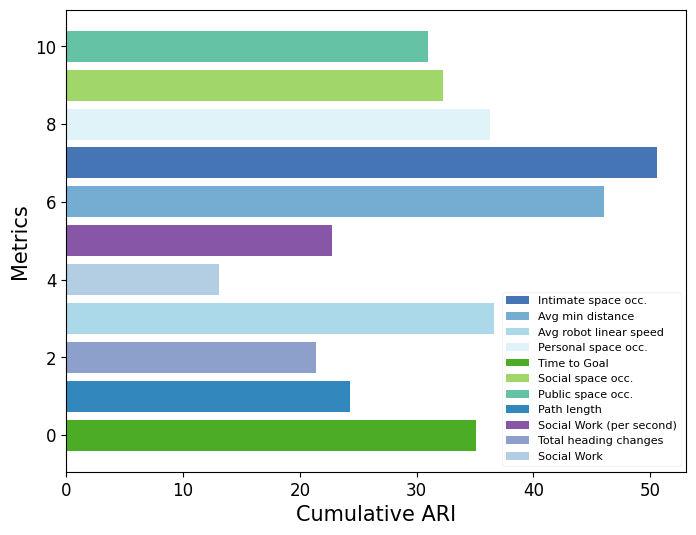

In [33]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
# Plot histogram for cumulative_ari_survey_sorted_3
# (Assuming cumulative_ari_survey_sorted_3 has been defined in previous cells)
names =["Time to Goal",
         "Path length",
         "Total heading changes",
         "Avg robot linear speed",        
         "Social Work", 
         "Social Work (per second)",
         "Avg min distance",
         "Intimate space occ.",
         "Personal space occ.",
         "Social space occ.",
         "Public space occ.",
         "Unobtrusiveness",
         "Friendliness",
         "Smoothness",
         "Avoidance Foresight"]
metrics = list(cumulative_ari_survey_sorted_3.keys())
ari_values = list(cumulative_ari_survey_sorted_3.values())
cold_colors = mcolors.ListedColormap([
    "#4575b4",  # Deep blue
    "#74add1",  # Light blue
    "#abd9e9",  # Pastel blue
    "#e0f3f8",  # Very light blue
    "#4dac26",  # Dark green
    "#a1d76a",  # Bright green
    "#66c2a5",  # Mint green
    "#3288bd",  # Medium blue
    "#8856a7",  # Muted purple
    "#8da0cb",  # Light lavender-blue
    "#b3cde3"   # Pale blue
])
# Generate ten colors using the "viridis" colormap
#cold_colors = plt.get_cmap('viridis', 10)
colors = [cold_colors(i) for i in range(len(metrics))]

plt.figure(figsize=(8, 6))
bars = []
bars = plt.barh(metrics, ari_values, color=colors, alpha=1)
#for i, (m, val) in enumerate(zip(metrics, ari_values)):
#    alpha_val = 1.0 if i < 5 else 0.5
#    bar = plt.barh(m, val, color=colors[i], alpha=alpha_val)
#    bars.append(bar[0])
plt.ylabel("Metrics", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cumulative ARI", fontsize=15)
#plt.title("Histogram of Cumulative ARI for three clusters", fontsize =18)
# Use the metric names for the legend labels
legend_labels = [f"{names[m]}" for m in metrics]
plt.legend(bars, legend_labels, loc='lower right', fontsize=8, framealpha=0.2)
#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(20))
#plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
plt.show()

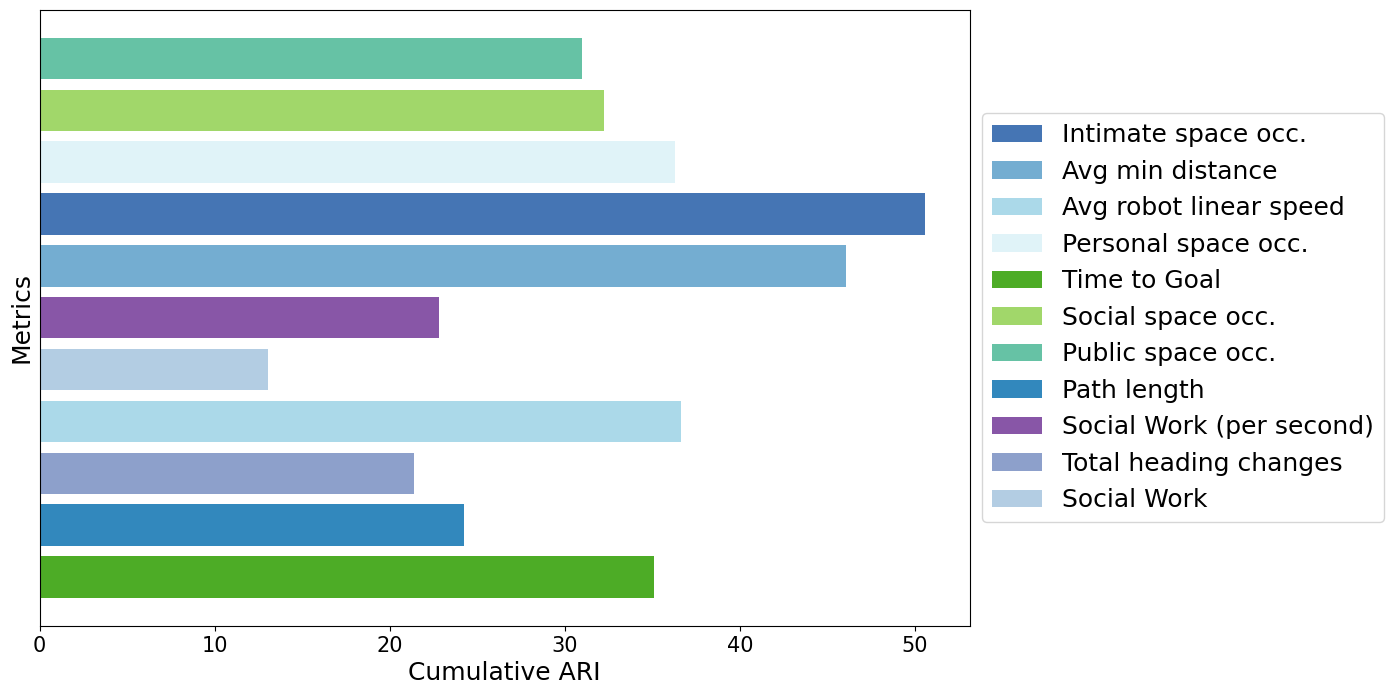

In [34]:
# Create the same plot with a more detailed legend

# fig,ax = plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(metrics, ari_values, color=colors, alpha=1)

ax.set_ylabel("Metrics", fontsize=18)
# ax.set_xticks(fontsize=12)
# ax.set_yticks(fontsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_yticks([])
ax.set_xlabel("Cumulative ARI", fontsize=18)

# Create legend with metric names and indices
legend_labels = [f"{names[m]}" for m in metrics]
ax.legend(bars, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

fig.savefig("/workspaces/hunavsim_devcontainer/src/plots/plot_cumulative_ARI_survey_metrics.svg", bbox_inches='tight', transparent=True, format='svg')